# Lista 02 - Probabilidade + Estatística

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from numpy.testing import *
from scipy import stats as ss

plt.style.use('seaborn-colorblind')
plt.ion()

# Exercício 01:


Suponha que a altura de mulheres adultas de algumas regiões seguem uma distribuição normal com $\mu = 162$ centímetros e $\sigma = 8$. Nesse caso, responda às perguntas abaixo:

ID:

(a) Dado que uma mulher mede 180

centímetros, qual a probabilidade de alguém escolhido ao acaso ser maior que ela? Para responder à questão, crie uma função a(), sem parâmetros, que retorna a resposta da questão com uma precisão de 4 casas decimais.

__Dica__:
1. a função round(var, n) retorna o valor da variável var com uma precisão de n casas decimais.
1. a classe `from scipy.stats.distributions import norm` implementa uma normal e já tem um método cdf e um método ppf (inverso da cdf).

In [2]:
# Crie aqui a função a() - com esse nome e sem parâmetros - 
# para retornar a resposta com precisão de 4 casas decimais!

### BEGIN SOLUTION
from scipy.stats.distributions import norm

def a():
    mu = 162
    sigma = 8
    h = 180
    p = 1 - norm.cdf(h, loc=mu, scale=sigma)
    return(round(p,4))
### END SOLUTION

In [3]:
### BEGIN HIDDEN TESTS
assert_equal(a(), 0.0122)
### END HIDDEN TESTS

(b) Uma treinadora dessa região quer montar uma equipe de basquete. Para isso, ela quer delimitar uma altura mínima $h$ que as jogadoras devem ter. Ele quer que $h$ seja maior que pelo menos $90\%$ das alturas de mulheres daquela região. Qual o valor de $h$? Para responder à questão, crie uma função _b()_, sem parâmetros, que retorna a resposta da questão com uma precisão de 4 casas decimais.  

__Dica:__  
a função _round(var, n)_ ou _np.round(var, n)_ retorna o valor da variável var com uma precisão de n casas decimais.

In [4]:
#Crie aqui a função b() - com esse nome e sem parâmetros - 
# para retornar a resposta com precisão de 4 casas decimais!

### BEGIN SOLUTION
def b():
    mu = 162
    sigma = 8
    h = norm.ppf(0.9, loc=mu, scale=sigma)
    return(round(h,4))
### END SOLUTION

In [5]:
### BEGIN HIDDEN TESTS
assert_almost_equal(b(), 172.252, 2)
### END HIDDEN TESTS

# Exercício 02:


As seguintes amostras foram geradas seguindo uma distribuição normal N($\mu$, $\sigma$), onde $\mu$, $\sigma$ não necessariamente são os mesmos para ambas. Nos histogramas gerados é possível visualizar essa distribuição.

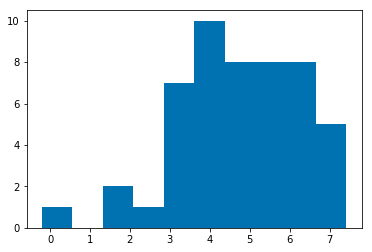

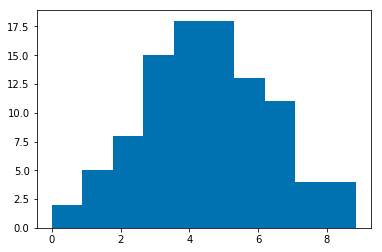

In [6]:
dados1 = [3.8739066,4.4360658,3.0235970,6.1573843,3.7793704,3.6493491,7.2910457,3.7489513,5.9306145,5.3897872,
          5.9091607,5.2491517,7.1163771,4.1930465,-0.1994626,3.2583011,5.9229948,1.8548338,4.8335581,5.2329008,
          1.5683191,5.8756518,3.4215138,4.7900996,5.9530234,4.4550699,3.3868535,5.3060581,4.2124300,7.0123823,
          4.9790184,2.2368825,3.9182012,5.4449732,5.7594690,5.4159924,3.5914275,3.4382886,4.0706780,6.9489863,
          6.3269462,2.8740986,7.4210664,4.6413206,4.2209699,4.2009752,6.2509627,4.9137823,4.9171593,6.3367493]

dados2 = [2.291049832,5.092164483,3.287501109,4.152289011,4.534256822,5.513028947,2.696660244,3.270482741,
          5.435338467,6.244110011,1.363583509,5.385855994,6.069527998,2.148361858,6.471584096,4.953202949,
          6.827787432,4.695468536,2.047598339,8.858080081,5.436394723,7.849470791,4.053545595,3.204185038,
          2.400954454,-0.002092845,3.571868529,6.202897955,5.224842718,4.958476608,6.708545254 -0.115002497,
          5.106492712,3.343396551,5.984204841,3.552744920,4.041155327,5.709103288,3.137316917,2.100906915,
          4.379147487,0.536031040,4.777440348,5.610527663,3.802506385,3.484180306,7.316861806,2.965851553,
          3.640560731,4.765175164,7.047545215,5.683723446,5.048988000,6.891720033,3.619091771,8.396155189,
          5.317492252,2.376071049,4.383045321,7.386186468,6.554626718,5.020433071,3.577328839,5.534419417,
          3.600534876,2.172314745,4.632719037,4.361328042,4.292156420,1.102889101,4.621840612,4.946746104,
          6.182937650,5.415993589,4.346608293,2.896446739,3.516568382,6.972384719,3.233811405,4.048606672,
          1.663547342,4.607297335 -0.753490459,3.205353052,1.269307121,0.962428478,4.718627886,4.686076530,
          2.919118501,6.204058666,4.803050149,4.670632749,2.811395731,7.214950058,3.275492976,2.336357937,
          8.494097155,6.473022507,8.525715511,4.364707111]

plt.hist(dados1)
plt.show()
plt.hist(dados2)
plt.show()

__a)__ A partir dos histogramas, tente aproximar uma normal a cada um deles, desenhando-a sobre o histograma. Para isso, você deve estimar valores de $\mu$ e $\sigma$. Não se esqueça de normalizar os dados, ou seja, o eixo y deve estar um uma escala de 0 a (no máximo) 1!

	mu		sigma
4.6908056600000005 1.5458402699769775


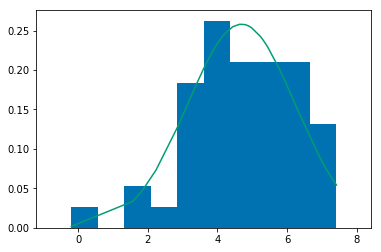

	mu		sigma
4.497123288234694 1.8493377980363603


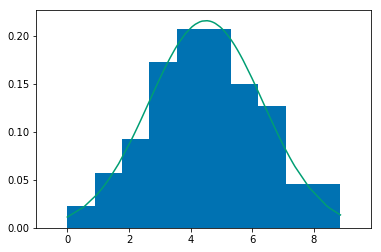

In [7]:
### BEGIN SOLUTION
def aprox_normal(data):
    plt.hist(data, density=True)

    mu = np.mean(data)
    sigma = np.std(data)

    print("\tmu\t\tsigma")
    print(mu, sigma)

    xs = np.unique(data)
    ys = norm.pdf(xs, loc=mu, scale=sigma)
    
    plt.plot(xs, ys)
    plt.xlim(min(data)-1, max(data)+1)

    plt.show()
    
aprox_normal(dados1)
aprox_normal(dados2)
### END SOLUTION

# Exercício 03:


Dado uma tabela com informações sobre uma amostra com 20 alunos contendo a nota desses alunos em algumas disciplinas e os níveis de dificuldade das mesmas, crie uma função que retorne a probabilidade condicional estimada à partir dos dados para dois eventos dados, informando ainda se os eventos são independentes ou não. Ou seja, dado a tabela mostrada no exemplo (lista de listas) e dois eventos A e B, retorne a probabilidade condicional de A dado B (P(A|B)) com uma precisão de 4 casas decimais. O retorno da função, entretanto, deve ser uma frase (string) escrita da seguinte forma: _str: val_ onde _str_ é a string "Independentes" se os eventos A e B são independentes e "Dependentes" caso contrário e _val_ é o valor da probabilidade condicional P(A|B) com uma precisão de 4 casas decimais.


__Dica:__  
a função format(var, '.nf') retorna uma string com o valor da variável var com uma precisão de exatamente n casas decimais.

In [8]:
# Esses dados se referem às notas (A-E) de 20 alunos de acordo com a dificuldade da disciplina (Fácil ou Difícil) 
# Coluna 1: id do aluno
# Coluna 2: dificuldade da disciplina ('Facil' ou 'Dificil')
# Coluna 3: nota do aluno (A-E)
data = [[1, 'Facil', 'C'],
        [2, 'Facil', 'A'],
        [3, 'Dificil', 'E'],
        [4, 'Dificil', 'B'],
        [5, 'Dificil', 'B'],
        [6, 'Dificil', 'A'],
        [7, 'Facil', 'D'],
        [8, 'Dificil', 'C'],
        [9, 'Facil', 'D'],
        [10, 'Facil', 'C'],
        [11, 'Facil', 'A'],
        [12, 'Facil', 'A'],
        [13, 'Dificil', 'B'],
        [14, 'Dificil', 'C'],
        [15, 'Dificil', 'E'],
        [16, 'Dificil', 'C'],
        [17, 'Facil', 'A'],
        [18, 'Dificil', 'D'],
        [19, 'Facil', 'B'],
        [20, 'Facil', 'A']]
data = pd.DataFrame(data, columns=['id', 'dificuldade', 'nota'])
data = data.set_index('id')
print(data)

def prob_cond(df,
              valor_nota: 'considere como A no bayes',
              valor_dificuldade: 'considere como B no bayes'):
    ### BEGIN SOLUTION
    lista_a = df[df['nota'] == valor_nota]
    event_a = len(lista_a) / len(df)
    
    lista_b = df[df['dificuldade'] == valor_dificuldade]
    event_b = len(lista_b) / len(df)
    
    lista_ab = df[(df['nota'] == valor_nota) & (df['dificuldade'] == valor_dificuldade)]
    event_ab = len(lista_ab) / len(df)
        
    if event_a == event_ab/event_b:
        return "Independentes: " + format(float(event_ab/event_b), '.4f')
    else:
        return "Dependentes: " + format(float(event_ab/event_b), '.4f')
    ### END SOLUTION


   dificuldade nota
id                 
1        Facil    C
2        Facil    A
3      Dificil    E
4      Dificil    B
5      Dificil    B
6      Dificil    A
7        Facil    D
8      Dificil    C
9        Facil    D
10       Facil    C
11       Facil    A
12       Facil    A
13     Dificil    B
14     Dificil    C
15     Dificil    E
16     Dificil    C
17       Facil    A
18     Dificil    D
19       Facil    B
20       Facil    A


In [9]:
"""Check that prob_cond returns the correct output for several inputs"""

assert_equal(prob_cond(data, 'A', 'Facil'), 'Dependentes: 0.5000')
assert_equal(prob_cond(data, 'E', 'Facil'), 'Dependentes: 0.0000')
assert_equal(prob_cond(data, 'A', 'Dificil'), 'Dependentes: 0.1000')
assert_equal(prob_cond(data, 'E', 'Dificil'), 'Dependentes: 0.2000')

In [10]:
### BEGIN HIDDEN TESTS
data2 = [[1, 'Facil', 'A'],
         [2, 'Facil', 'B'],
         [3, 'Facil', 'C'],
         [4, 'Facil', 'D'],
         [5, 'Facil', 'E'],
         [1, 'Dificil', 'A'],
         [2, 'Dificil', 'B'],
         [3, 'Dificil', 'C'],
         [4, 'Dificil', 'D'],
         [5, 'Dificil', 'E']]
data2 = pd.DataFrame(data2, columns=['id', 'dificuldade', 'nota'])
data2 = data2.set_index('id')

data3 = [[1, 'Facil', 'A'],
         [2, 'Facil', 'A']]
data3 = pd.DataFrame(data3, columns=['id', 'dificuldade', 'nota'])
data3 = data3.set_index('id')

data4 = [[1, 'Facil', 'A'],
         [2, 'Facil', 'A'],
         [3, 'Facil', 'A'],
         [4, 'Facil', 'A'],
         [5, 'Facil', 'A'],
         [1, 'Dificil', 'E'],
         [2, 'Dificil', 'E'],
         [3, 'Dificil', 'E'],
         [4, 'Dificil', 'E'],
         [5, 'Dificil', 'E']]
data4 = pd.DataFrame(data4, columns=['id', 'dificuldade', 'nota'])
data4 = data4.set_index('id')

assert_equal(prob_cond(data2, 'A', 'Facil'), 'Independentes: 0.2000')
assert_equal(prob_cond(data2, 'A', 'Dificil'), 'Independentes: 0.2000')
assert_equal(prob_cond(data3, 'A', 'Facil'), 'Independentes: 1.0000')
assert_equal(prob_cond(data3, 'E', 'Facil'), 'Independentes: 0.0000')
assert_equal(prob_cond(data4, 'A', 'Facil'), 'Dependentes: 1.0000')
assert_equal(prob_cond(data4, 'E', 'Dificil'), 'Dependentes: 1.0000')
### END HIDDEN TESTS

# Exercício 04:


Utilizando os dados de acidentes fatais em companhias aéreas dos Estados Unidos de 1985 a 1999, calcule algumas estatísticas básicas. Você deve retornar uma __lista__ com os valores das estatísticas calculadas, sendo elas, nessa ordem: menor valor, maior valor, média, mediana, variância e desvio-padrão. Para responder à questão, crie uma função _estat(acidentes)_ que retorna a lista com os valores correspondentes às resposta da questão, inteiros quando forem inteiros ou com uma precisão de 4 casas decimais caso contrário.

__Teste:__
`assert_equal(estat(acidentes), ans)`, sendo que `ans` é uma lista contendo os valores corretos para as estatísticas que este exercício pede.

__Dicas:__  
1) A função round(var, n) retorna o valor da variável var com uma precisão de n casas decimais.

2) Execute o teste `assert_equal(estat(lista_boba), ans_bobo)` para alguma `lista_boba` que você saiba calcular as estatísticas no papel.


__Fonte:__ https://aviation-safety.net/

In [11]:
# Crie aqui a função estat(acidentes) - com esse nome e parâmetro - 
# a função deve retornar a lista com as respostas com precisão de 4 casas decimais!

### BEGIN SOLUTION

def estat(acidentes):
    e_list = [np.min(acidentes),
              np.max(acidentes),
              np.mean(acidentes),
              np.median(acidentes),
              np.var(acidentes),
              np.std(acidentes)]
    return np.round(e_list, 4)
### END SOLUTION


In [12]:
### BEGIN HIDDEN TESTS
acidentes = [0,14,0,1,0,4,1,0,0,2,1,5,0,3,0,0,6,1,1,12,3,1,5,0,3,0,0,1,1,0,1,5,2,1,1,3,4,0,3,0,2,2,1,0,1,1,1,3,0,4,3,8,7,3,0,1]
ans = [0, 14, 2.1786, 1.0, 8.0395, 2.8354]

assert_array_equal(estat(acidentes), ans)
### END HIDDEN TESTS

# Exercício 05:


Procure encontrar correlações espúrias interessantes e apresente um exemplo encontrado. Ou seja, aprensente dois conjuntos de dados que possuem alta correlação (muito positivas ou muito negativas) sem que um seja de fato o causador do outro. Além disso, deixe resgistrado os gráficos com a distribuição dos dados e um gráfico de dispersão como forma de visualizar a correlação entre os dados. Calcule a covariância e correlação entre os dados e, por fim, se possível, tente explicar qual poderia ser a verdadeira causa da ocorrência das observações. Para isso, utilize a última célula desse notebook.


__Observação:__  
Para ideias de correlações espúrias, veja os seguintes sites:  
http://tylervigen.com/spurious-correlations  
https://en.wikipedia.org/wiki/Spurious_relationship#Other_relationships  


(0.6660043486679172, 0.025268547131045434)


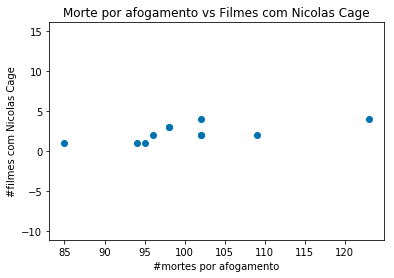

In [13]:
### BEGIN SOLUTION
#Number people who drowned by falling into a swimming-pool
#Deaths (US) (CDC)
a = [109,102,102,98,85,95,96,98,123,94,102]
#Number of films Nicolas Cage appeared in Films (IMDB)
b = [2,2,2,3,1,1,2,3,4,1,4]

print(ss.pearsonr(a,b))

plt.scatter(a, b)
plt.axis("equal")
plt.title("Morte por afogamento vs Filmes com Nicolas Cage")
plt.xlabel("#mortes por afogamento")
plt.ylabel("#filmes com Nicolas Cage")
plt.show()
### END SOLUTION
